# 0:  Loading the MNIST fashion data set

It is already split out into a train and test set,  but the X and y values (label or target) are in single file

In this version, we want to build a multiple category classification system, rather than a binary classifier

The opening section of this notebook is identical to the binary classification assignment

Use the ideas from the in class exercise using the MNIST digits set to build a classifier for the Fashion data with multiple categories

I'm going to get you started here a bit,  but pay attention to how I load the data here and the data formats used.

This data came as two csv files, with the filenames as shown

I got the data files from kaggle.com,  this data set is widely distributed

I loaded this as a pandas data frame,  this is a relatively reliable, easy data frame to use

I think this file has a header

See

https://www.kaggle.com/zalando-research/fashionmnist


# load the pandas and numpy libraries
used for the data frame tools (Pandas) and to define matrices and do linear algebra (Numpy)

In [1]:
import pandas as pd
import numpy as np

The next steps load the test and training data into pandas data frames

Pandas has a dataframe structure much like the R dataframe, or an SQL table

There are many pandas member functions that do useful operations on the data frame,  here the
read_csv() member function is used to load csv files into data frames.

The infile style variables need to have the full path name to the location of the data files in use

If you are working on a local computer, download thes files and then enter their full file address below, using the same format I used.

If you are using google colab to run this,

         -click on the file menu on the left command bar

         -click on the sample data folder (or create it)

         -upload the two files to colab's file storage

                -fashion-mnist_train.csv

                -fashion-mnist_test.csv
          
          -when the files are uploaded, right click on them and
             copy the file addresses down to the infile names below
  

In [2]:
# the first two lines are for an upload of the data file on a local computer

#train_infile="D:\\Example_data\\MNIST\\fashion-mnist_train.csv"

#test_infile="D:\\Example_data\\MNIST\\fashion-mnist_test.csv"


# the next two lines are in infile names when I ran this on Colab

train_infile="../Data/fashion-mnist_train.csv"

test_infile="../Data/fashion-mnist_test.csv"


train_df=pd.read_csv(train_infile)

test_df=pd.read_csv(test_infile)

Let's look at the available member function for a pandas data frame

In [3]:
dir(test_df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

In [4]:
test_df.columns[0:5]

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4'], dtype='object')

In [5]:
test_df.shape

(10000, 785)

In [6]:
train_df.shape

(60000, 785)

Okay,  I'm expecting 28 x 28 greyscale images again,  we have the first column as the label, the rest of this is the pixels

Most skearn models will accept pandas dataframes as input data,   so I don't think we need to do much here except split out
the first column as y and the rest of the df as X

pandas has a member function called pop that removes a row from the dataframe.  We'll use that to both set y_train equal to the labels, and X_train to the remaining df

In [7]:
y_train=train_df.pop('label')
X_train=train_df

In [8]:
print(y_train.shape)
print(X_train.shape)

(60000,)
(60000, 784)


In [9]:
y_test=test_df.pop('label')
X_test=test_df

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

The % symbol indicates that this is a magic function,  that is to say a function
command for the jupyter notebook server, not to the python kernel

This particular command causes plots created using the matplotlib libary to print in the
notebook not in a new window

In [10]:
%matplotlib inline

## 1: Data plots

Okay here is the visualization of one image, a shirt

Note:   I use a location slice of the X_train dataframe,    X_train.loc[0,:] to get row zero, all entries,  or the first
    image in the array.   I then force that into the np.array form so I can use the reshape() member function to reshape the
    row of data into a 28 x 28 image.
    
    I don't think that pandas easily allows the reshape maneuver, so that's why I converted to an np.array,  the
    reshape operation produces an np matrix that can be plotted with imshow.  There may be a better way to do this.  Hmm.
    
Also I checked, and we can feed X_train into the training input of the classifier as a pd.dataframe, there is no need to change
the format

Most sklearn models will accept either pandas dataframes or np matrices as inputs,  which is a help

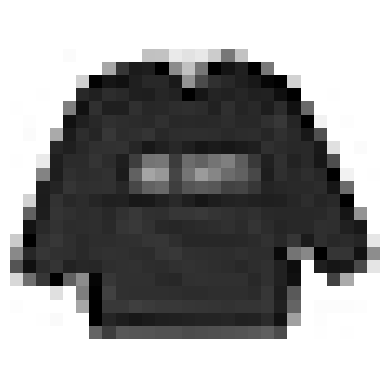

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[0,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [12]:
y_train[0]

2

# Question/Action

What type of cloting is this image supposed to be?   Insert a cell with your answer below

#Question/Action

Show images of a sandal and a sneaker from this data set, show them in cells below

Show all your steps

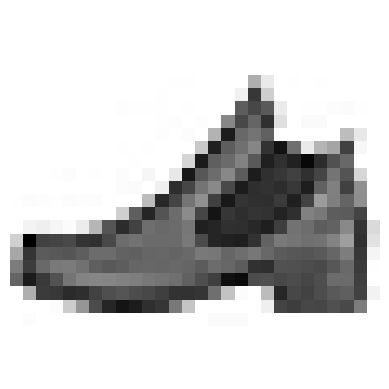

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = np.array(X_train.loc[1,:])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y_train[1]

9

## 2: Time to Build some models

Lets build a multi category classifying neural net model

fclf - this should classify each image to one of the ten label classes (0-9)



## Okay, go build some models-Assignment

1.) For each model find the accuracy, the confusion matrix, the precision and the recall, label these all/
    Look at the confusion matrix,  explain which classes of objects were most likely to be confused with
    each other and which were most distinct.  Explain why you think this happens,  does it make sense?

    I ran these quickly (so I know this works) and got 87.7 % accuracy for the X-train data set using all 10 classes and
    97.7 % accuracy  for the binary classification (ie the pullover detector).  See if you can beat the quick results I got.       Post your results in the discussion section of D2L for this week.  Discuss what you did to beat my score

2.) Also, create the ROC curve for the binary classifier and compute the AUC for the ROC,  for the binary classifier,  but not for the 10 element classifier

3.) When you are done with steps 1 and 2,   use your two classifier models to classify the test data.
    Is there evidence of overfitting?  What tells you this?


Print your completed jupyter notebook to a pdf file,  you can use the browser to print to pdf.  Upload this to dropbox in D2L to submit the homework.

## fclf2-  A binary classifier as either class 2 or not

Since class two is a pullover, this is a "pullover detector"

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=500,hidden_layer_sizes=(20,15,15,10), verbose=True, warm_start=False)
# the hidden layers were 20,10,5
clf.fit(X_train, y_train)

Iteration 1, loss = 2.39701701
Iteration 2, loss = 1.26783595
Iteration 3, loss = 0.91331237
Iteration 4, loss = 0.78310348
Iteration 5, loss = 0.69564741
Iteration 6, loss = 0.63831862
Iteration 7, loss = 0.57820165
Iteration 8, loss = 0.53043468
Iteration 9, loss = 0.49799182
Iteration 10, loss = 0.47684637
Iteration 11, loss = 0.46056097
Iteration 12, loss = 0.44871773
Iteration 13, loss = 0.43886652
Iteration 14, loss = 0.43281108
Iteration 15, loss = 0.42625512
Iteration 16, loss = 0.42238268
Iteration 17, loss = 0.41704239
Iteration 18, loss = 0.41061998
Iteration 19, loss = 0.41468647
Iteration 20, loss = 0.40866045
Iteration 21, loss = 0.40560107
Iteration 22, loss = 0.39711162
Iteration 23, loss = 0.39359247
Iteration 24, loss = 0.39429087
Iteration 25, loss = 0.39189282
Iteration 26, loss = 0.38827783
Iteration 27, loss = 0.38641069
Iteration 28, loss = 0.38699566
Iteration 29, loss = 0.38334247
Iteration 30, loss = 0.38240784
Iteration 31, loss = 0.37543925
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 15, 15, 10), max_iter=500,
              random_state=1, verbose=True)

In [16]:
clf.predict_proba(X_test.iloc[:10,:])

array([[6.72385918e-001, 5.04030646e-007, 1.51678749e-005,
        8.76450799e-006, 8.77883579e-007, 4.07601340e-024,
        3.27555320e-001, 5.04984645e-060, 3.34484903e-005,
        1.08742223e-017],
       [2.00368068e-018, 9.99999997e-001, 1.03142483e-043,
        3.76742609e-012, 3.17456073e-009, 8.72707309e-075,
        1.75549873e-028, 8.92745988e-136, 1.00432803e-024,
        2.83130753e-053],
       [1.46322415e-002, 1.54464640e-004, 8.72715524e-001,
        1.36606068e-002, 1.90523850e-002, 2.61092497e-010,
        7.88079560e-002, 9.83435557e-018, 9.71157278e-004,
        5.66472759e-006],
       [3.06618459e-001, 6.01482318e-004, 1.69784042e-001,
        2.00693210e-002, 5.03760022e-003, 1.39617687e-010,
        4.92441525e-001, 4.56697738e-022, 5.44694574e-003,
        6.25733581e-007],
       [3.63280069e-003, 1.62981810e-003, 1.26684000e-002,
        4.53463784e-001, 5.10413010e-001, 1.66927370e-039,
        1.80587851e-002, 1.57567182e-072, 1.33401418e-004,
        5.8

In [17]:
clf.predict(X_test.iloc[:10,:])

array([0, 1, 2, 6, 4, 6, 8, 6, 5, 0], dtype=int64)

In [18]:
y_test[0:10]

0    0
1    1
2    2
3    2
4    3
5    2
6    8
7    6
8    5
9    0
Name: label, dtype: int64

In [21]:
y_pred=clf.predict(X_train)

In [22]:
from sklearn.metrics import confusion_matrix

my_cm=confusion_matrix(y_train,y_pred)
my_cm

array([[5146,   16,   91,  118,   21,    0,  596,    0,   12,    0],
       [   6, 5875,    9,   65,   29,    1,   14,    0,    1,    0],
       [  27,    0, 4775,   35,  908,    0,  251,    0,    4,    0],
       [ 213,   71,   85, 5110,  366,    1,  149,    0,    4,    1],
       [   3,    6,  355,   79, 5386,    3,  168,    0,    0,    0],
       [   0,    0,    1,    0,    0, 5923,    3,   56,    4,   13],
       [ 879,    6,  676,   74,  806,    0, 3548,    0,   11,    0],
       [   0,    0,    0,    0,    0,   47,    0, 5835,    3,  115],
       [  14,    2,   32,    8,   30,   12,   75,   28, 5799,    0],
       [   0,    0,    0,    0,    0,   12,    0,  214,    0, 5774]],
      dtype=int64)

# Action
Add the confusion matrix and visualize it as a heatmap

<Axes: >

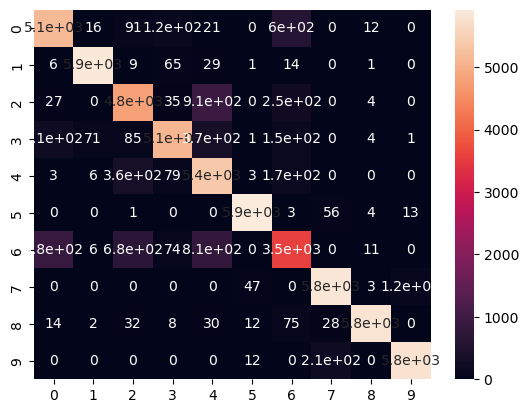

In [24]:
import seaborn as sns

sns.heatmap(my_cm,annot=True)

In [ ]:
plt.ticklabel_format(useOffset=False)


<Axes: >

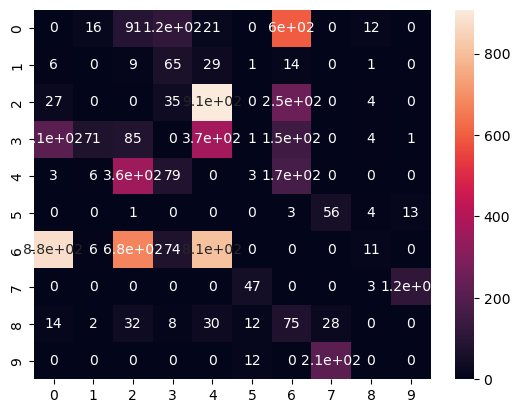

In [25]:
import numpy as np

sns.heatmap(my_cm-np.eye(my_cm.shape[0])*my_cm,annot=True)

# Action

Figure out how to calculate the percentage of correct answers for each category

In [23]:
my_cm.trace()/my_cm.sum()

0.8861833333333333

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8184    0.8577    0.8376      6000
           1     0.9831    0.9792    0.9811      6000
           2     0.7927    0.7958    0.7942      6000
           3     0.9310    0.8517    0.8895      6000
           4     0.7138    0.8977    0.7952      6000
           5     0.9873    0.9872    0.9872      6000
           6     0.7386    0.5913    0.6568      6000
           7     0.9514    0.9725    0.9618      6000
           8     0.9933    0.9665    0.9797      6000
           9     0.9781    0.9623    0.9702      6000

    accuracy                         0.8862     60000
   macro avg     0.8888    0.8862    0.8853     60000
weighted avg     0.8888    0.8862    0.8853     60000

